<a href="https://colab.research.google.com/github/Balaji507/Leaf-disease-detection/blob/main/5_Tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==1.0.0-beta0

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras.utils as image
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow 
import keras
from tensorflow.keras.models import Model as model

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
classification_result="tomato"

In [ ]:
if classification_result=='corn and maize':
  train_path="/content/drive/MyDrive/Datasets/Corn_and_Maize/train"
  test_path="/content/drive/MyDrive/Datasets/Corn_and_Maize/test"
  det_dictionary = {0: "blight", 1: "common rust", 2: "gray leaf spot", 3: "healthy"}
elif classification_result=='cotton':
  train_path="/content/drive/MyDrive/Datasets/Cotton/train"
  test_path="/content/drive/MyDrive/Datasets/Cotton/test"
  det_dictionary = {0: "Black root rot", 1: "Lint contamination", 2: "Healthy", 3: "Healthy"}
elif classification_result=='grape':
  train_path="/content/drive/MyDrive/Datasets/Grape/train"
  test_path="/content/drive/MyDrive/Datasets/Grape/test"
  det_dictionary = {0: "Black rot(grape)", 1: "Grape Esca (Black Measles)", 2: "healthy", 3: "leaf blight (Isariopsis Leaf Spot)"}
elif classification_result=='potato':
  train_path="/content/drive/MyDrive/Datasets/Potato/Train"
  test_path="/content/drive/MyDrive/Datasets/Potato/Test"
  det_dictionary = {0: "Early blight", 1: "Healthy", 2: "late blight"}
elif classification_result=='tomato':
  train_path="/content/drive/MyDrive/Datasets/Tomato/train"
  test_path="/content/drive/MyDrive/Datasets/Tomato/test"
  det_dictionary = {0: "bacterial spot", 1: "Early Blight", 2: "Late Blight", 3: "Leaf Mold", 4: "Septoria leaf spot", 5: "Spider mites", 6: "Target spot", 7 : "Yellow leaf curl virus" , 8: "Mosaic virus", 9: "Healthy"}

In [ ]:
trdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

tsdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory=train_path,target_size=(256,256),batch_size = 32,class_mode = 'categorical')
testdata = tsdata.flow_from_directory(directory=test_path, target_size=(256,256),batch_size = 32,class_mode = 'categorical')

Found 5000 images belonging to 10 classes.
Found 1010 images belonging to 10 classes.


In [ ]:
num_classes=len(traindata.class_indices)
print(num_classes)

10


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
history = model.fit_generator(traindata,epochs=20,validation_data=testdata)

Epoch 1/20
157/157 [==============================] - 1617s 10s/step - loss: 1.7751 - accuracy: 0.3586 - val_loss: 1.2817 - val_accuracy: 0.5297
Epoch 2/20
157/157 [==============================] - 781s 5s/step - loss: 1.0367 - accuracy: 0.6362 - val_loss: 1.0012 - val_accuracy: 0.6584
Epoch 3/20
157/157 [==============================] - 779s 5s/step - loss: 0.8433 - accuracy: 0.7068 - val_loss: 1.0947 - val_accuracy: 0.6248
Epoch 4/20
157/157 [==============================] - 763s 5s/step - loss: 0.6788 - accuracy: 0.7592 - val_loss: 0.8545 - val_accuracy: 0.7069
Epoch 5/20
157/157 [==============================] - 758s 5s/step - loss: 0.6675 - accuracy: 0.7672 - val_loss: 0.6909 - val_accuracy: 0.7634
Epoch 6/20
157/157 [==============================] - 757s 5s/step - loss: 0.5272 - accuracy: 0.8158 - val_loss: 0.6795 - val_accuracy: 0.7891
Epoch 7/20
157/157 [==============================] - 755s 5s/step - loss: 0.4858 - accuracy: 0.8276 - val_loss: 0.6896 - val_accuracy: 0.79

In [ ]:
model.save("/content/drive/MyDrive/Model_Save/tomato.h5")

In [ ]:
from keras.models import load_model
classifier=load_model("/content/drive/MyDrive/Model_Save/tomato.h5")

In [ ]:
img = image.load_img('/content/drive/MyDrive/Datasets/Tomato/test/Tomato___Target_Spot/1d51081c-bd57-42aa-9a2b-c394912e87c7___Com.G_TgS_FL 9740.JPG', target_size=(256, 256))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x / 255.
predictions = classifier.predict(x)
class_index = predictions
class_index1 = np.argmax(predictions)
print(class_index)
detection_result = (det_dictionary[class_index1])
print(detection_result)

1/1 [==============================] - 0s 159ms/step
[[1.0753451e-08 1.8989092e-04 1.4099359e-06 7.9878340e-11 7.3760814e-10
  1.6534829e-01 8.3445984e-01 2.4351079e-10 4.2660628e-12 5.5273688e-07]]
Target spot


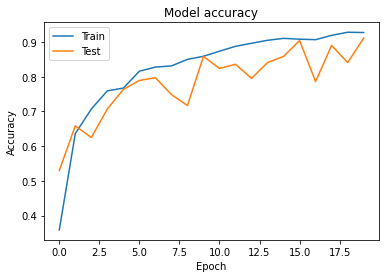

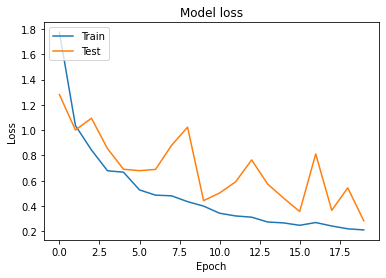

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()